## **Семестровая работа**

#### Вариант 4

No1 Задача регрессии (20 баллов)

Возьмите набор данных согласно своему варианту
(https://cloud.mail.ru/public/AQp5/X3obvSZRo). Датасет представляет собой набор признаков, признак в последнем столбце является целевым (его надо прогнозировать).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/dataset_var4.csv", delimiter=";",
                 names=[f"data{i}" for i in range(8)])
df.head()


,data0,data1,data2,data3,data4,data5,data6,data7
0,0.323710,0.929629,-0.767670,1.116340,-0.070416,-0.096773,-1.341757,88.929263
1,-2.653632,-0.812825,0.747477,NaN,-0.073235,-0.447236,-0.308805,-111.970141
2,-1.012406,-0.014101,NaN,-0.821736,0.129890,1.606278,0.284032,-40.252999
3,-0.633402,-0.549693,NaN,0.170157,-0.516859,-0.303740,1.429740,-11.120857
4,1.127122,-0.792454,NaN,0.064311,-0.070108,-1.234200,-1.306032,-33.972466


data7 - целевой признак

##### 1. Проведите предварительный анализ и подготовку данных, обработайте пропущенные значения

In [3]:
df.isna().sum()


data0     0
data1     0
data2    70
data3     5
data4     0
data5     0
data6     0
data7     0
dtype: int64

Столбец 2 содержит большое количество пропусков, следовательно его можно удалить полностью

In [4]:
df = df.drop("data2", axis=1)


In [5]:
df.isna().sum()


data0    0
data1    0
data3    5
data4    0
data5    0
data6    0
data7    0
dtype: int64

Удалить 5 строк с пропущенным в data3 значением

In [6]:
df = df.dropna()


In [7]:
df.isna().sum()


data0    0
data1    0
data3    0
data4    0
data5    0
data6    0
data7    0
dtype: int64

##### 2. Проведите статистический анализ, оцените корреляции между признаками, оцените возможные выбросы в данных, постройте поясняющие графики. Удалите из рассмотрения признаки, которые не влияют на целевой.

In [8]:
df.describe()


,data0,data1,data3,data4,data5,data6,data7
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,-0.199422,-0.110951,0.078808,-0.069097,0.152081,0.155669,-1.819365
std,0.961151,1.821826,0.987839,0.974943,0.976145,0.983317,66.651875
min,-2.902561,-7.350727,-1.907869,-2.888812,-2.638386,-1.830461,-134.157584
25%,-0.709725,-0.916439,-0.620862,-0.651368,-0.396814,-0.467832,-46.618073
50%,-0.312134,-0.252094,0.027166,-0.070416,0.181632,0.079464,-6.808182
75%,0.503918,0.574195,0.557889,0.580341,0.828973,0.749598,46.876857
max,1.943964,12.993976,3.084039,2.514780,2.040266,2.652419,157.810739


In [9]:
corrmat = df.corr()
corrmat


,data0,data1,data3,data4,data5,data6,data7
data0,1.000000,-0.016936,0.074944,-0.053772,-0.191713,0.064401,0.053900
data1,-0.016936,1.000000,-0.122184,0.067675,0.170592,-0.023871,0.228127
data3,0.074944,-0.122184,1.000000,-0.023679,-0.156040,-0.105068,0.783673
data4,-0.053772,0.067675,-0.023679,1.000000,-0.113457,0.021193,0.395530
data5,-0.191713,0.170592,-0.156040,-0.113457,1.000000,0.021991,-0.121787
data6,0.064401,-0.023871,-0.105068,0.021193,0.021991,1.000000,-0.008002
data7,0.053900,0.228127,0.783673,0.395530,-0.121787,-0.008002,1.000000


<AxesSubplot:>

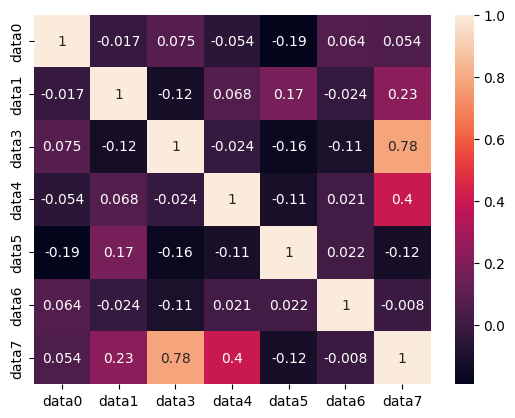

In [10]:
sns.heatmap(corrmat, annot=True)


По корреляционной матрице видно, что data6 очень слабо коррелирует с целевой переменной data7. Следовательно, data6 можно удалить


In [11]:
df = df.drop("data6", axis=1)


Выбросы в данных:

<AxesSubplot:>

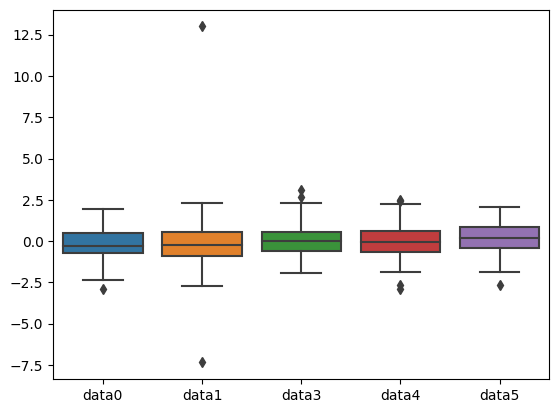

In [12]:
sns.boxplot(df.iloc[:, :-1])


Удаление выбросов:

In [13]:
df = df.loc[df["data0"] >= -2.5]

df = df.loc[df["data1"] >= -2.5]
df = df.loc[df["data1"] <= 2.5]

df = df.loc[df["data3"] <= 2.5]

df = df.loc[df["data4"] <= 2.3]
df = df.loc[df["data4"] >= -2.4]

df = df.loc[df["data5"] >= -2.4]
df



,data0,data1,data3,data4,data5,data7
0,0.323710,0.929629,1.116340,-0.070416,-0.096773,88.929263
2,-1.012406,-0.014101,-0.821736,0.129890,1.606278,-40.252999
3,-0.633402,-0.549693,0.170157,-0.516859,-0.303740,-11.120857
4,1.127122,-0.792454,0.064311,-0.070108,-1.234200,-33.972466
5,-0.491143,-0.198721,-1.162147,1.124064,1.767891,-43.445488
...,...,...,...,...,...,...
94,0.257765,-0.376271,1.946588,-1.011902,0.236452,81.423788
95,-0.511010,0.510621,0.308947,-0.132423,-1.027070,28.272050
96,-0.720866,0.101553,-0.936991,-0.626092,-0.120187,-76.814252
98,-0.492031,-0.330730,-0.320204,-0.927244,0.587869,-48.915663


##### 3. Разбейте выборку на тренировочные и тестовые данные (60% на 40%).

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop("data7", axis=1)
y = df["data7"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



##### 4. Для предсказания целевого признака постройте следующие модели, используя библиотеку sklearn:






##### 5. Для каждой модели попытайтесь добиться наилучшего возможного результата предсказания.

a. Линейная регрессия LinearRegression()

In [15]:
from sklearn.linear_model import LinearRegression

linr = LinearRegression()
linr.fit(X_train, y_train)
linr.score(X_test, y_test)


0.9900623083922716

b. Случайный лес RandomForestRegressor()

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_test, y_test)


0.799053115676593

c. Метод ближайших соседей KNeighborsRegressor()

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(X_train, y_train)
knr.score(X_test, y_test)


0.6852285260584652

d. Метод опорных векторов SVR()

In [18]:
from sklearn.svm import SVR

svr = SVR(C=500)
svr.fit(X_train, y_train)
svr.score(X_test, y_test)


0.8054799641549033

##### 6. Оцените качество работы моделей. Выведите для каждой модели ее score(). Напишите какая модель дала наилучший результат. Выведите ее значение feature_importances

Самый высокий score у модели LinearRegression -  0.99

In [21]:
print(linr.coef_)
print(linr.feature_names_in_)


[-1.3530193  31.28420957 59.67670829 29.99567967  0.68855339]
['data0' 'data1' 'data3' 'data4' 'data5']
